# Feature Engineering

### Importing libraries

In [2]:
#  pip install imperio kydavra crucio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imperio import BoxCoxTransformer, ZCATransformer
from imperio import FrequencyImputationTransformer, TargetImputationTransformer
from sklearn.metrics import precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")


### Importing the dataset

In [6]:
df = pd.read_csv('data2.csv')

In [12]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume,Sale (Dollars),Volume Sold (Liters),Profit Margin,City_DES_MOINES,City_WATERLOO,City_IOWA_CITY,Rest_Cities
0,2191.0,52632.0,56.0,1701130.0,255.0,297.0,6.0,0.75,162.84,4.50,54.30,0.0,0.0,0.0,1.0
1,2205.0,51632.0,73.0,1701100.0,255.0,297.0,6.0,0.75,325.68,9.00,108.60,0.0,0.0,0.0,1.0
2,3549.0,52627.0,56.0,1701170.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40,0.0,0.0,0.0,1.0
3,2513.0,522.0,52.0,1156330.0,65.0,237.0,3.0,1.75,160.02,5.25,53.37,0.0,0.0,1.0,0.0
4,3942.0,52342.0,86.0,1508310.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022925,3704.0,536.0,74.0,1081200.0,434.0,68846.0,12.0,0.75,11.54,0.75,3.85,0.0,0.0,0.0,1.0
10022926,3704.0,536.0,74.0,1081200.0,330.0,80457.0,12.0,1.00,10.85,3.00,10.86,0.0,0.0,0.0,1.0
10022927,3704.0,536.0,74.0,1081200.0,260.0,68306.0,12.0,0.75,9.75,0.75,3.25,0.0,0.0,0.0,1.0
10022928,3704.0,536.0,74.0,1081100.0,65.0,67557.0,12.0,1.00,12.59,6.00,25.20,0.0,0.0,0.0,1.0


# Working with Outliers

In [8]:
df['Volume Sold (Liters)'].describe()

count    1.002293e+07
mean     8.638176e+00
std      2.935109e+01
min      0.000000e+00
25%      1.500000e+00
50%      4.500000e+00
75%      1.050000e+01
max      1.500000e+04
Name: Volume Sold (Liters), dtype: float64

The max value indicates the presence of outliers.

Let's the outliers

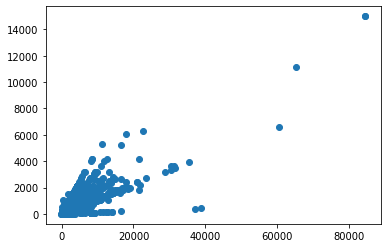

In [8]:
plt.scatter(df['Profit Margin'], df['Volume Sold (Liters)']) 
plt.show()

In [7]:
df = df[df['Profit Margin'] < 50000]

In [8]:
df

,Unnamed: 0,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume,Sale (Dollars),Volume Sold (Liters),Profit Margin,City_DES_MOINES,City_WATERLOO,City_IOWA_CITY,Rest_Cities
0,0,2191.0,52632.0,56.0,1701130.0,255.0,297.0,6.0,0.75,162.84,4.50,54.30,0.0,0.0,0.0,1.0
1,1,2205.0,51632.0,73.0,1701100.0,255.0,297.0,6.0,0.75,325.68,9.00,108.60,0.0,0.0,0.0,1.0
2,2,3549.0,52627.0,56.0,1701170.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40,0.0,0.0,0.0,1.0
3,3,2513.0,522.0,52.0,1156330.0,65.0,237.0,3.0,1.75,160.02,5.25,53.37,0.0,0.0,1.0,0.0
4,4,3942.0,52342.0,86.0,1508310.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022925,10022925,3704.0,536.0,74.0,1081200.0,434.0,68846.0,12.0,0.75,11.54,0.75,3.85,0.0,0.0,0.0,1.0
10022926,10022926,3704.0,536.0,74.0,1081200.0,330.0,80457.0,12.0,1.00,10.85,3.00,10.86,0.0,0.0,0.0,1.0
10022927,10022927,3704.0,536.0,74.0,1081200.0,260.0,68306.0,12.0,0.75,9.75,0.75,3.25,0.0,0.0,0.0,1.0
10022928,10022928,3704.0,536.0,74.0,1081100.0,65.0,67557.0,12.0,1.00,12.59,6.00,25.20,0.0,0.0,0.0,1.0


In [9]:
df = df.reset_index(drop=True)

In [14]:
def plot_scatter(model,df,name):
    """
            This function find the anomalities of data sample and plots them with a different color.
        param:  model :   Anomaly model algorithm
        param:  df : pd.DataFrame
        param:  name: String, name of the actual anomaly  detection algorithm
    """
    # Getting a copy of the actual data.
    df2 = scaled_df.copy()

    # Applying the model on the data sample
    df2['anomalies_score']=pd.Series(model.fit_predict(df2.values))
    color = df2['anomalies_score']

    print('---------------------------------------------------------------------------------')
    # Printing the score. Either -1 or 1.
    print('The number of anomalies (the actual score) : \n')
    print(df2['anomalies_score'].value_counts())

    # Reassigning the dataframe with anomalies
    df2 = df2[df2.anomalies_score == -1]

    # Dropping the score
    df2 = df2.drop(['anomalies_score'], axis=1)

    # Plotting
    plt.scatter(X_scaled[:,0], y_scaled, c = color, s = 25)
    plt.title(name)
    plt.show()
    print('---------------------------------------------------------------------------------')


In [ ]:
plot_scatter(EllipticEnvelope() , df, 'Elliptic Envelope')
plot_scatter(LocalOutlierFactor(), df,'Local Outlier Factor')

The RAM dies so I deleted the ouliers manually.

In [10]:
df = df.drop(['City_DES_MOINES', 'City_WATERLOO', 'City_IOWA_CITY', 'Rest_Cities'], axis=1)

In [13]:
df

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume,Sale (Dollars),Volume Sold (Liters),Profit Margin
0,2191.0,52632.0,56.0,1701130.0,255.0,297.0,6.0,0.75,162.84,4.50,54.30
1,2205.0,51632.0,73.0,1701100.0,255.0,297.0,6.0,0.75,325.68,9.00,108.60
2,3549.0,52627.0,56.0,1701170.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40
3,2513.0,522.0,52.0,1156330.0,65.0,237.0,3.0,1.75,160.02,5.25,53.37
4,3942.0,52342.0,86.0,1508310.0,130.0,249.0,20.0,0.15,19.20,0.30,6.40
...,...,...,...,...,...,...,...,...,...,...,...
10022921,3704.0,536.0,74.0,1081200.0,434.0,68846.0,12.0,0.75,11.54,0.75,3.85
10022922,3704.0,536.0,74.0,1081200.0,330.0,80457.0,12.0,1.00,10.85,3.00,10.86
10022923,3704.0,536.0,74.0,1081200.0,260.0,68306.0,12.0,0.75,9.75,0.75,3.25
10022924,3704.0,536.0,74.0,1081100.0,65.0,67557.0,12.0,1.00,12.59,6.00,25.20


In [14]:
df.isnull().sum()

Store Number            0
Zip Code                0
County Number           0
Category                0
Vendor Number           0
Item Number             0
Pack                    0
Bottle Volume           0
Sale (Dollars)          0
Volume Sold (Liters)    0
Profit Margin           0
dtype: int64

In [15]:
# box-cox for numerical
df = BoxCoxTransformer().apply(df, target='Volume Sold (Liters)')

/usr/local/lib/python3.8/dist-packages/imperio/BoxCox.py:45: RuntimeWarning: invalid value encountered in sqrt
  return np.log(value) if self.l == 0 else (self.l ** (-1)) * (value ** self.l - 1)


In [16]:
df.isnull().sum()

Store Number             0
Zip Code                 0
County Number            0
Category                 0
Vendor Number            0
Item Number              0
Pack                     0
Bottle Volume            0
Sale (Dollars)           0
Volume Sold (Liters)     0
Profit Margin           23
dtype: int64

In [17]:
df = df.dropna(subset = ['Profit Margin'])

In [18]:
df = df.reset_index(drop=True, inplace=False)

In [19]:
df_target = df['Volume Sold (Liters)'].copy()

In [20]:
df_s = df.drop('Volume Sold (Liters)', axis=1)

In [21]:
scaler = StandardScaler() # or  MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_s), columns=df_s.columns)

In [24]:
df_final = pd.concat([scaled_df, df_target], axis=1)

In [25]:
df_final

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume,Sale (Dollars),Profit Margin,Volume Sold (Liters)
0,-1.596053,2.022190,0.108315,12.022508,0.151527,-2.604004,-1.066954,-0.280075,0.561837,0.581077,4.50
1,-1.576230,1.996349,0.598453,12.022018,0.151527,-2.604004,-1.066954,-0.280075,1.420251,1.436338,9.00
2,0.098772,2.022062,0.108315,12.023160,-0.762788,-2.624480,1.255013,-2.251074,-0.798948,-0.774840,0.30
3,-1.155038,-0.415376,-0.017473,2.276590,-1.431361,-2.629901,-1.890562,1.600853,0.543814,0.563319,5.25
4,0.525203,2.014722,0.935604,8.781287,-0.762788,-2.624480,1.255013,-2.251074,-0.798948,-0.774840,0.30
...,...,...,...,...,...,...,...,...,...,...,...
10022898,0.269645,-0.411784,0.625403,0.764543,1.125298,0.848505,0.097805,-0.280075,-0.958869,-0.933906,0.75
10022899,0.269645,-0.411784,0.625403,0.764543,0.591407,1.147973,0.097805,0.271520,-0.975617,-0.560307,3.00
10022900,0.269645,-0.411784,0.625403,0.764543,0.182718,0.833985,0.097805,-0.280075,-1.003458,-0.978561,0.75
10022901,0.269645,-0.411784,0.625403,0.762496,-1.431361,0.813749,0.097805,0.271520,-0.934317,-0.077093,6.00


In [26]:
df_final.to_csv("data3.csv")